# Support Vector Regression

## STEPS
- Importing the libraries
- Importing the datasets
- Data Cleaning, Data Exploration, Data Manipulation, Data Visualisation
- EDA - Exploratory Data Analysis
- Splitting the dataset
- Choosing the model
- Training the model
- Testing the model
- Model Evaluation
- [Optional] Export the dataset into the .csv format

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

### Importing the dataset

In [61]:
df = pd.read_csv('Datasets/train.csv')

## PROBLEM STATEMENT`
 Given a dataset which captures the salary from July 1st, 2013 through June 30th 2014. It includes only those employees who are employed on June 30,2014. Predict the salary of Employees working in Baltimore.

### Exploratory Data Analysis

In [62]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [64]:
df.shape

(18981, 7)

In [65]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [66]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [67]:
# Name has an extra space which makes it difficult to access
df.rename(columns = {' Name' : 'Name'}, inplace = True)

In [68]:
# Another way to do it and make the columns lower case
# Copying the original df
newdf = df.copy()

In [69]:
# Removing the leading and trailing spaces
newdf.columns = newdf.columns.str.strip().str.lower()

In [70]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [71]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [72]:
# Checking for null values
newdf.isnull().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [73]:
# Delete the column GrossPay
newdf.drop('grosspay', inplace = True, axis = 1)

In [74]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [75]:
newdf.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18976    W02235
18977    W02629
18978    A99416
18979    A99262
18980    A50206
Name: agencyid, Length: 18981, dtype: object

In [76]:
# Find out which agency id is repeated for how many times
newdf.agencyid.value_counts()

agencyid
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: count, Length: 1177, dtype: int64

In [77]:
newdf[newdf['agencyid'] == 'P04001']['agency']

23       R&P-Recreation (part-ti
34       R&P-Recreation (part-ti
86       R&P-Recreation (part-ti
130      R&P-Recreation (part-ti
151      R&P-Recreation (part-ti
                  ...           
18764    R&P-Recreation (part-ti
18814    R&P-Recreation (part-ti
18938    R&P-Recreation (part-ti
18943    R&P-Recreation (part-ti
18957    R&P-Recreation (part-ti
Name: agency, Length: 316, dtype: object

In [78]:
# Should get the agencyid and agency without the extra unneccesary part
newdf[['agencyid','agency']]

,agencyid,agency
0,W02200,Youth Summer
1,A03031,OED-Employment Dev
2,A29005,States Attorneys Office
3,A65026,HLTH-Health Department
4,A99416,Police Department
...,...,...
18976,W02235,Youth Summer
18977,W02629,Youth Summer
18978,A99416,Police Department
18979,A99262,Police Department


#### Each agency id has a single agency name. We are mapping them

In [ ]:
newdf.agencyid.value_counts().map(newdf.agency)

agencyid
P04001    HLTH-Health Department 
C90786             Youth Summer  
W02629         Police Department 
P04002           DPW-Solid Waste 
A99416             Youth Summer  
                   ...           
W02539        OED-Employment Dev 
A65052        OED-Employment Dev 
W02106        OED-Employment Dev 
W02590        OED-Employment Dev 
W02339        OED-Employment Dev 
Name: count, Length: 1177, dtype: object

#### Make the newdf in such a way that the agencies that have higher occurance should be in the top

In [ ]:
# Count occurrences of each agency
agency_counts = df['Agency'].value_counts()

# Sort the DataFrame by agency occurrence
# newdf = df.copy()
newdf['AgencyCount'] = newdf['agency'].map(agency_counts)
newdf = newdf.sort_values(by='AgencyCount', ascending=False).drop(columns=['AgencyCount'])

# Reset index if desired
newdf.reset_index(drop=True, inplace=True)
newdf

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Saffran,Katlynn N",AIDE BLUE CHIP,W02229,Youth Summer,05/21/2014,$11310.00
2,"Clay,Shamia S",AIDE BLUE CHIP,W02377,Youth Summer,06/13/2014,$11310.00
3,"Sahmoudi,Kaoutar",AIDE BLUE CHIP,W02288,Youth Summer,05/21/2014,$11310.00
4,"Salaam II,Raqib A",AIDE BLUE CHIP,W02548,Youth Summer,06/23/2014,$11310.00
...,...,...,...,...,...,...
18976,"Thompson Jr,David H",DIR SOCIAL SERV (SUPPLEMENT),SCS066,Special City Services,04/11/2014,$30000.00
18977,"Evers,Timothy M",MEDIA PRODUCER DIRECTOR I,A44035,M-R Cable & Comm,12/17/2001,$54510.00
18978,"Thomas,Rhonda D",ADMINISTRATIVE OFFICER,A44035,M-R Cable & Comm,12/16/2002,$54600.00
18979,"Frantz,Henry K",MISCELLANEOUS,SCS066,Special City Services,07/01/1991,$2484.00


In [82]:
# List out all the agency name for each agency id... The name has to be printed for each occurence

# List all agency names for each agency ID
result = newdf[['agencyid', 'agency']]
result

,agencyid,agency
0,W02200,Youth Summer
1,W02229,Youth Summer
2,W02377,Youth Summer
3,W02288,Youth Summer
4,W02548,Youth Summer
...,...,...
18976,SCS066,Special City Services
18977,A44035,M-R Cable & Comm
18978,A44035,M-R Cable & Comm
18979,SCS066,Special City Services


In [23]:
newdf.annualsalary.value_counts()

annualsalary
$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     163
             ... 
$56199.00       1
$94744.00       1
$96700.00       1
$95100.00       1
$11866.00       1
Name: count, Length: 1590, dtype: int64

In [24]:
# Remove the $ from the annualsalary column and change the dtype to integer
newdf.annualsalary = newdf['annualsalary'].str.replace('$','').astype(float)

In [25]:
newdf.annualsalary = newdf['annualsalary'].astype(int)

In [26]:
newdf.annualsalary

0        11310
1        11310
2        11310
3        11310
4        11310
         ...  
18976    30000
18977    54510
18978    54600
18979     2484
18980    11866
Name: annualsalary, Length: 18981, dtype: int32

In [27]:
# Instead of hiredate -> 3 columns should be there
# hireday, hiremonth, hireyear (int)
newdf['hiredate'] = pd.to_datetime(newdf['hiredate'])

In [28]:
newdf['hireday'] = newdf['hiredate'].dt.day
newdf['hiremonth'] = newdf['hiredate'].dt.month
newdf['hireyear'] = newdf['hiredate'].dt.year

In [29]:
newdf.isnull().sum()
# There are null values. Replace null values with 0 and then convert into int

name             0
jobtitle         0
agencyid         0
agency           0
hiredate        70
annualsalary     0
hireday         70
hiremonth       70
hireyear        70
dtype: int64

In [30]:
newdf['hireday'] = newdf['hireday'].fillna(0).astype(int)
newdf['hiremonth'] = newdf['hiremonth'].fillna(0).astype(int)
newdf['hireyear'] = newdf['hireyear'].fillna(0).astype(int)

In [31]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hireday,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310,10,6,2013
1,"Saffran,Katlynn N",AIDE BLUE CHIP,W02229,Youth Summer,2014-05-21,11310,21,5,2014
2,"Clay,Shamia S",AIDE BLUE CHIP,W02377,Youth Summer,2014-06-13,11310,13,6,2014
3,"Sahmoudi,Kaoutar",AIDE BLUE CHIP,W02288,Youth Summer,2014-05-21,11310,21,5,2014
4,"Salaam II,Raqib A",AIDE BLUE CHIP,W02548,Youth Summer,2014-06-23,11310,23,6,2014


In [32]:
newdf.drop('hiredate', inplace = True, axis = 1)

In [33]:
# These added columns should be before annual salary
newdf = newdf[['name', 'jobtitle', 'agencyid', 'agency', 'hireday',
       'hiremonth', 'hireyear', 'annualsalary']]

#### Plot a BoxPlot for the annualsalary column

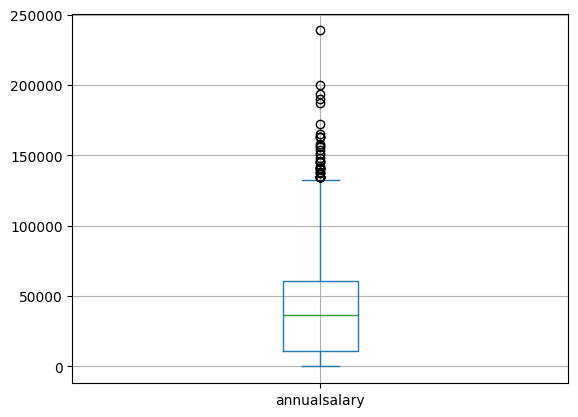

In [ ]:
newdf.annualsalary.plot.box()
plt.grid()

#### Plot top 10 Jobs based on hiring

<Axes: xlabel='jobtitle'>

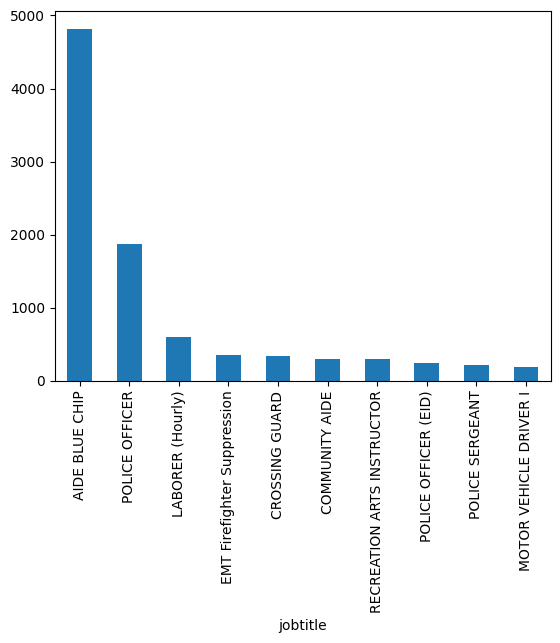

In [ ]:
newdf.groupby(['jobtitle'])['name'].count().sort_values(ascending = False).head(10).plot.bar()

#### Plot top 10 jobs with the highest average salary

In [84]:
newdf.groupby(['jobtitle'])['annualsalary'].mean().sort_values(ascending = False).head(10).plot.bar()

TypeError: agg function failed [how->mean,dtype->object]

#### Plot top 10 jobs with the highest salary

<Axes: xlabel='jobtitle'>

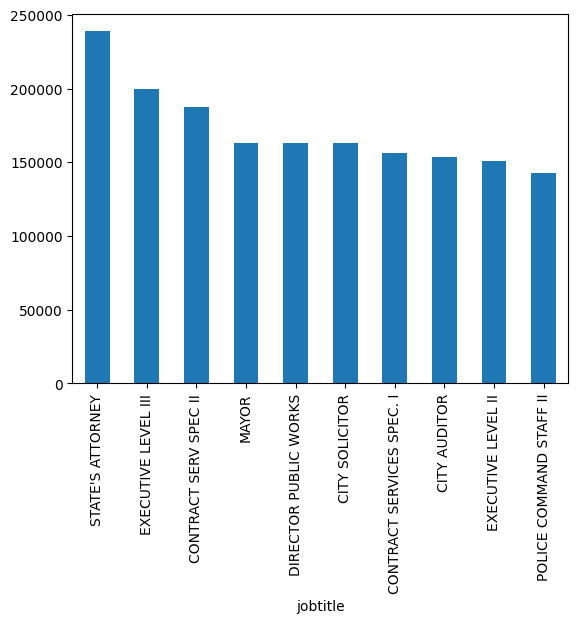

In [ ]:
newdf.groupby(['jobtitle'])['annualsalary'].max().sort_values(ascending = False).head(10).plot.bar()

#### Plot top 10 Agency's ID that has highest number of Employees

<Axes: xlabel='agencyid'>

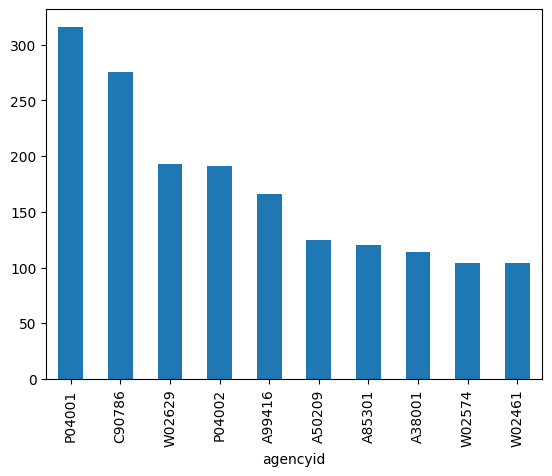

In [ ]:
newdf.groupby(['agencyid'])['name'].count().sort_values(ascending = False).head(10).plot.bar()

#### Plot the Highest Salary V/s Year graph

<Axes: xlabel='hireyear'>

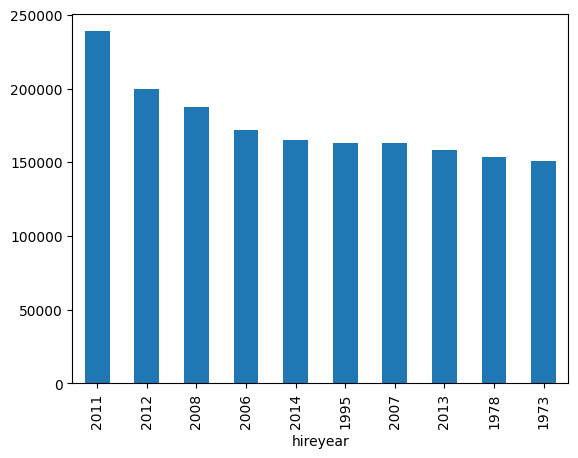

In [ ]:
newdf.groupby('hireyear')['annualsalary'].max().sort_values(ascending = False).head(10).plot.bar()

#### Plot Average Salary V/s Year graph

<Axes: xlabel='hireyear'>

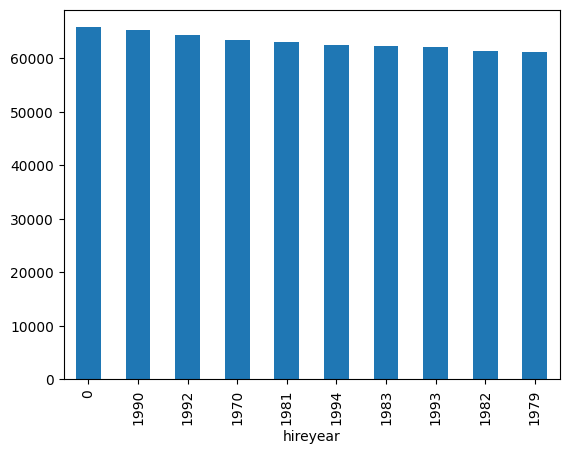

In [ ]:
newdf.groupby('hireyear')['annualsalary'].mean().sort_values(ascending = False).head(10).plot.bar()

#### Plot a graph to check on which month most of the people are hired

<Axes: xlabel='hiremonth'>

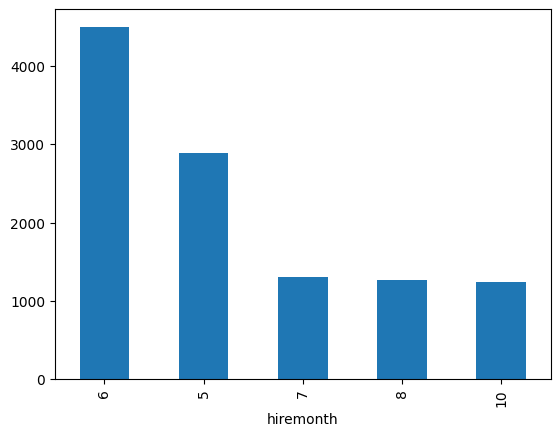

In [ ]:
newdf.groupby('hiremonth')['name'].count().sort_values(ascending = False).head(5).plot.bar()

#### Plot a pairplot

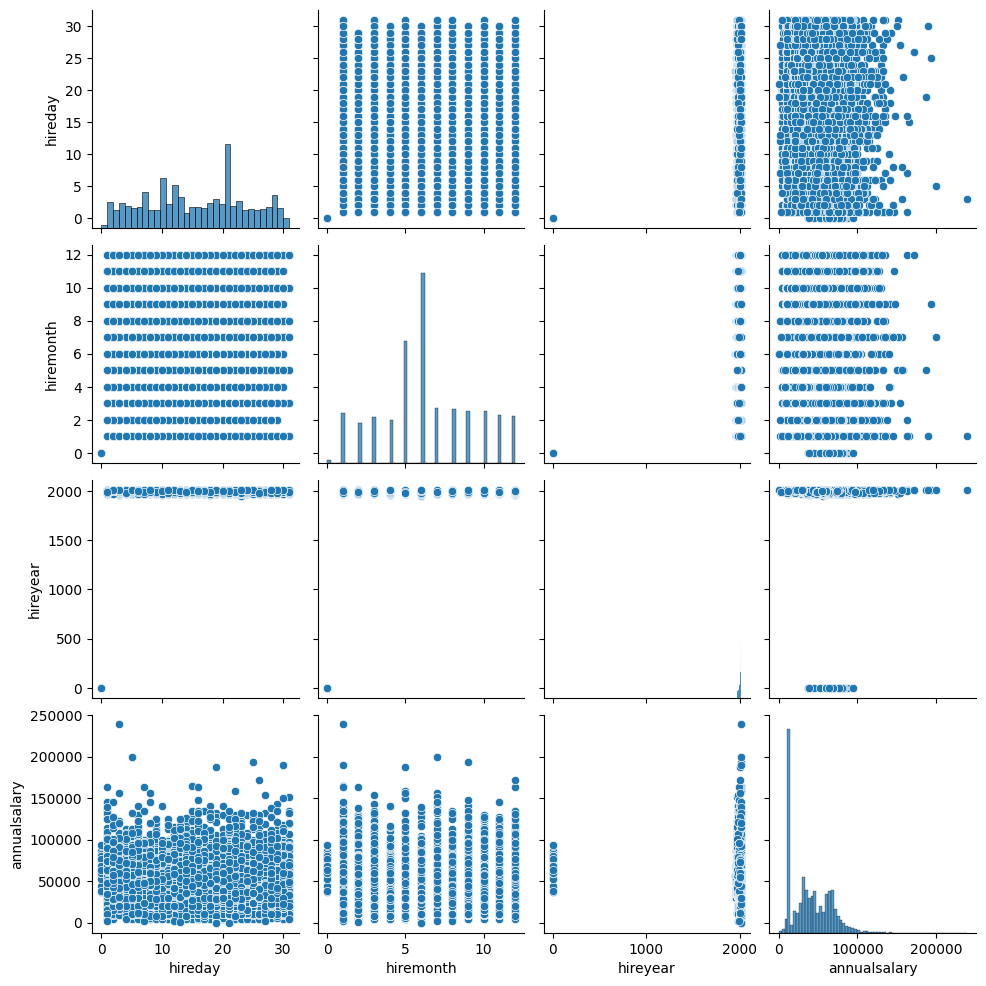

In [ ]:
sns.pairplot(newdf)

#### Plot a heatmap

<Axes: >

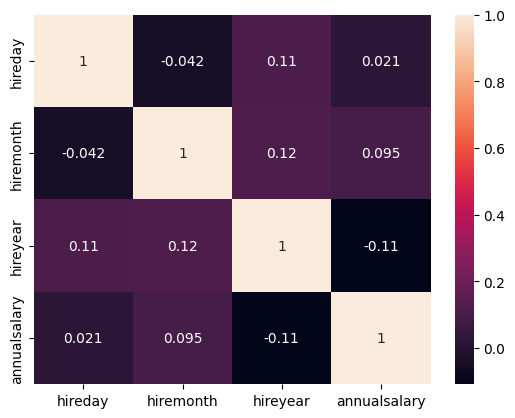

In [ ]:
numeric_df = newdf.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True)

In [86]:
stanscale = StandardScaler()

In [87]:
# X = stanscale.fit_transform(X.reshape(-1, 1))
# y = stanscale.fit_transform(y.reshape(-1, 1))

In [88]:
# X = newdf.drop(['annualsalary', 'name'], axis =1)
# y = newdf['annualsalary']

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# MACHINE LEARNING

## Train test split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 14)

## Data Preporcessing - Feature Scaling

### Choose a model (svr)

In [90]:
model = SVR(kernel = 'rbf')

In [94]:
# Train the model
# model.fit(X_train, y_train)

In [51]:
# Test the model
# y_pred = model.predict(y_test)

In [52]:
# Performance Metrics

In [53]:
# Conclusion
# If an employee joins on the following date: 
# 04/04/2015, 02/09/2018, 21/12/2021
# Predict the salaries

# Using Pipelines
A **Pipeline** is used in **Support Vector Regression (SVR)** or any machine learning model to streamline workflows by chaining preprocessing steps and model training into a single object. This is especially helpful when you have a sequence of transformations and want to avoid repetitive code and potential data leakage.

In [95]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the feature matrix (X) and target vector (y)
X = newdf.drop(columns=['annualsalary', 'name'])
y = newdf['annualsalary']

# Define the preprocessing for numerical and categorical features
numeric_features = ['hireday', 'hiremonth', 'hireyear']
categorical_features = ['jobtitle', 'agencyid', 'agency']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Define the SVR model
svr_model = SVR()

# Create a pipeline that preprocesses the data and then fits the SVR model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svr_model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR model
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


ValueError: A given column is not a column of the dataframe

In [ ]:
plt.scatter(y_test, y_pred)

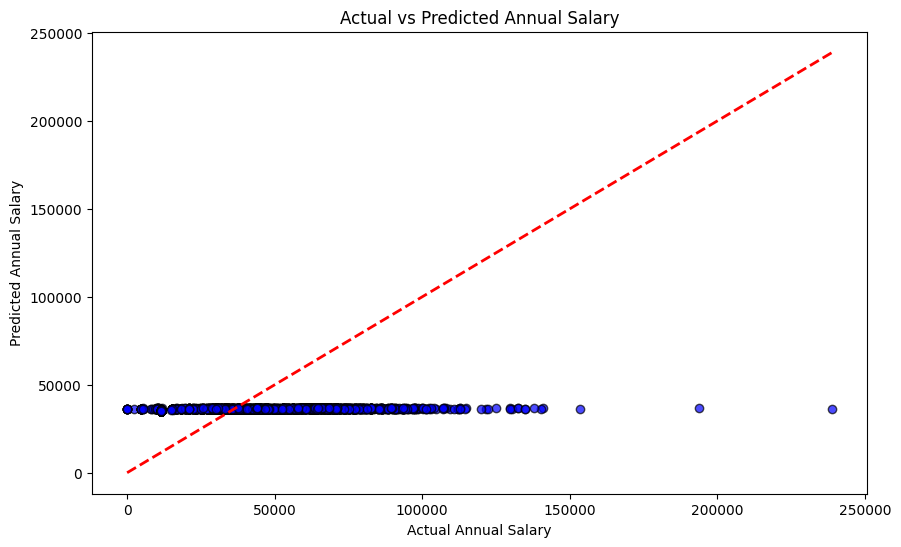

In [57]:
# Assuming y_test and y_pred are already defined from the model's predictions
# Plot the actual vs. predicted annual salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Annual Salary')
plt.ylabel('Predicted Annual Salary')
plt.title('Actual vs Predicted Annual Salary')
plt.show()

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0072584308707498435

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets